In [3]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('R_cleaned_data.csv')

In [5]:
def target_encode(age,gender):
    if age<=40 and gender=='Male':
        return 'Young men'
    elif age>40 and gender=='Male':
        return 'Old men'
    elif age<=40 and gender=='Female':
        return 'Young women'
    else:
        return 'Old women'

In [6]:
def get_cleaned_DrugData(DrugName):
    df_clean = df[['Age','Gender',DrugName,'Description1','Description2']].dropna()
    df_clean = pd.get_dummies(df_clean, columns=['Description1','Description2'])
    
    df_clean['Age_normalized'] = df_clean['Age'].apply(lambda x: sum(map(int,(x.split('-'))))/2)
    df_clean['Target'] = df_clean.apply(lambda x: target_encode(x.Age_normalized,x.Gender),axis=1)
    df_clean.drop(['Age','Gender'],inplace=True,axis=1)
    
    X = df_clean.drop('Target',axis=1)
    y = df_clean['Target']
    
    X_scaler = StandardScaler()
    X = X_scaler.fit_transform(X)

    print('Before Data Balancing, Category count--')
    print('-'*30)
    print(y.value_counts())
    # data balancing
    smt = SMOTE(random_state=2)
    X_smote, y_smote = smt.fit_resample(X, y)
    print('\nAfter Data Balancing, Category count--')
    print('-'*30)
    print(y_smote.value_counts())
    X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [7]:
labels = ['Young women', 'Young men', 'Old women', 'Old men']

def model_performance(y_test,y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred,labels=labels)
    df_cm = pd.DataFrame(confusion_mat, index = labels,
                      columns = labels)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
    
    print('-'*45,'Classification Report','-'*45)
    print(classification_report(y_test,y_pred))
    print('-'*50,'Accuracy','-'*50)
    print(round(accuracy_score(y_test,y_pred),3))

In [8]:
def buildModel(X_train, X_test, y_train, y_test):
    
    print(f"\n######################### \033[1mSVC\033[0m ##################################")
    svc_classifier = SVC(kernel = 'linear', random_state = 42)
    svc_classifier.fit(X_train, y_train)
    svc_y_pred = svc_classifier.predict(X_test)
    model_performance(y_test, svc_y_pred)
        
    print(f"\n######################### \033[1mPOLY\033[0m ##################################")
    svc_classifier = SVC(kernel = 'poly', random_state = 42)
    svc_classifier.fit(X_train, y_train)
    svc_y_pred = svc_classifier.predict(X_test)
    model_performance(y_test, svc_y_pred)
        
    print(f"\n######################### \033[1mRBF\033[0m ##################################")
    svc_classifier = SVC(kernel = 'rbf', random_state = 42)
    svc_classifier.fit(X_train, y_train)
    svc_y_pred = svc_classifier.predict(X_test)
    model_performance(y_test, svc_y_pred)
    
    print(f"\n######################### \033[1msigmoid\033[0m ##################################")
    svc_classifier = SVC(kernel = 'sigmoid', random_state = 42)
    svc_classifier.fit(X_train, y_train)
    svc_y_pred = svc_classifier.predict(X_test)
    model_performance(y_test, svc_y_pred)

# column name

In [9]:
list(df)

['Age',
 'Gender',
 'AMITRIPTYLINE',
 'BUPROPION',
 'CITALOPRAM',
 'DESVENLAFAXINE',
 'DOXEPIN',
 'DULOXETINE',
 'ESCITALOPRAM',
 'FLUOXETINE',
 'MIRTAZAPINE',
 'NORTRIPTYLINE',
 'PAROXETINE',
 'ROPINIROLE',
 'SERTRALINE',
 'TRAZODONE',
 'VENLAFAXINE',
 'OTHER',
 'Description1',
 'Description2',
 'Description3',
 'Description4',
 'Description5',
 'Description6',
 'Description7']

# Analysis for individual drug
- Just change the Drug name here, remaining everything will be same.

Before Data Balancing, Category count--
------------------------------
Old women      368
Young women    108
Old men         65
Young men       18
Name: Target, dtype: int64

After Data Balancing, Category count--
------------------------------
Young women    368
Young men      368
Old women      368
Old men        368
Name: Target, dtype: int64

######################### SVC ##################################


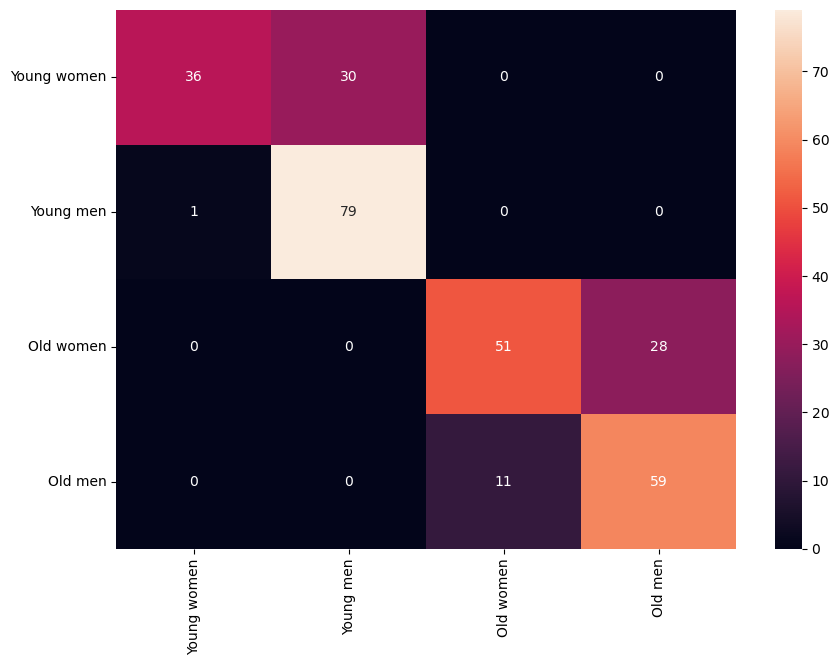

--------------------------------------------- Classification Report ---------------------------------------------
              precision    recall  f1-score   support

     Old men       0.68      0.84      0.75        70
   Old women       0.82      0.65      0.72        79
   Young men       0.72      0.99      0.84        80
 Young women       0.97      0.55      0.70        66

    accuracy                           0.76       295
   macro avg       0.80      0.76      0.75       295
weighted avg       0.80      0.76      0.76       295

-------------------------------------------------- Accuracy --------------------------------------------------
0.763

######################### POLY ##################################


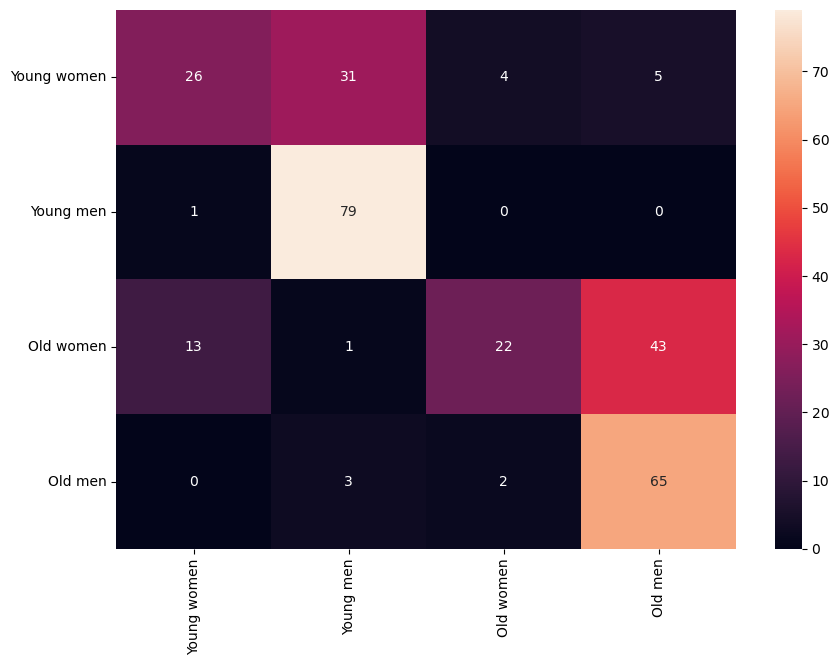

--------------------------------------------- Classification Report ---------------------------------------------
              precision    recall  f1-score   support

     Old men       0.58      0.93      0.71        70
   Old women       0.79      0.28      0.41        79
   Young men       0.69      0.99      0.81        80
 Young women       0.65      0.39      0.49        66

    accuracy                           0.65       295
   macro avg       0.68      0.65      0.61       295
weighted avg       0.68      0.65      0.61       295

-------------------------------------------------- Accuracy --------------------------------------------------
0.651

######################### RBF ##################################


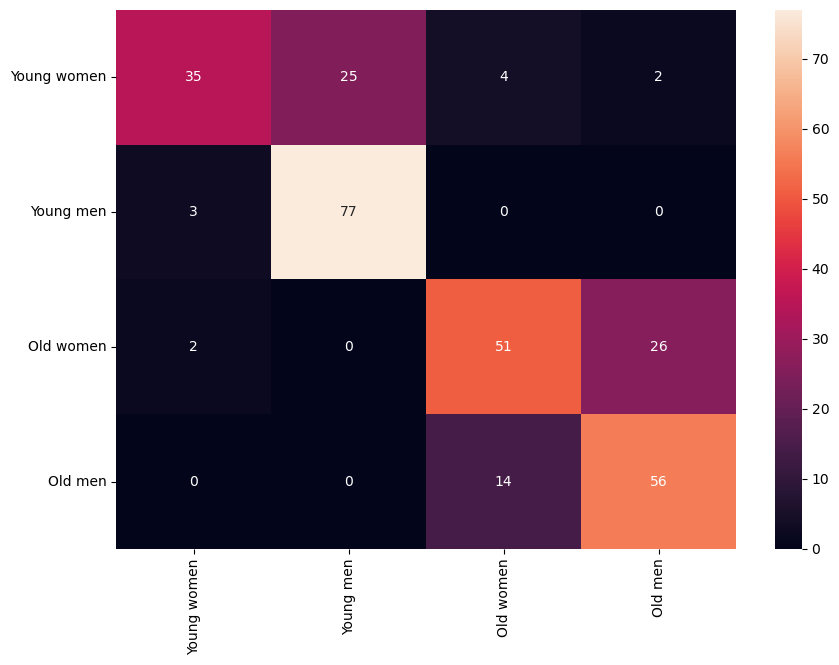

--------------------------------------------- Classification Report ---------------------------------------------
              precision    recall  f1-score   support

     Old men       0.67      0.80      0.73        70
   Old women       0.74      0.65      0.69        79
   Young men       0.75      0.96      0.85        80
 Young women       0.88      0.53      0.66        66

    accuracy                           0.74       295
   macro avg       0.76      0.73      0.73       295
weighted avg       0.76      0.74      0.73       295

-------------------------------------------------- Accuracy --------------------------------------------------
0.742

######################### sigmoid ##################################


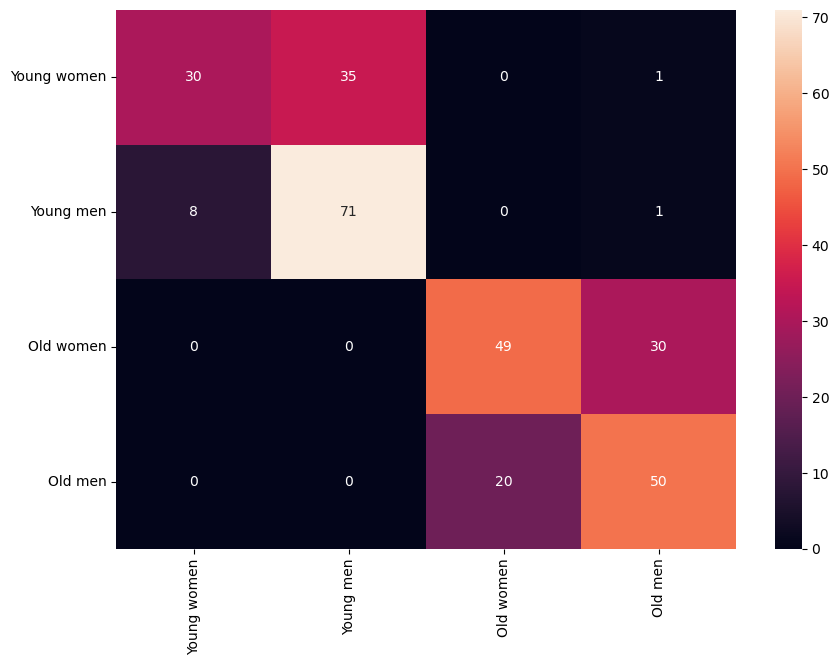

--------------------------------------------- Classification Report ---------------------------------------------
              precision    recall  f1-score   support

     Old men       0.61      0.71      0.66        70
   Old women       0.71      0.62      0.66        79
   Young men       0.67      0.89      0.76        80
 Young women       0.79      0.45      0.58        66

    accuracy                           0.68       295
   macro avg       0.69      0.67      0.67       295
weighted avg       0.69      0.68      0.67       295

-------------------------------------------------- Accuracy --------------------------------------------------
0.678


In [10]:
X_train, X_test, y_train, y_test = get_cleaned_DrugData('AMITRIPTYLINE')
buildModel(X_train, X_test, y_train, y_test)

# Class distribution

In [16]:
df_clean = df[['Age','Gender','AMITRIPTYLINE','Description1','Description2']].dropna()
df_clean = pd.get_dummies(df_clean, columns=['Description1','Description2'])
    
df_clean['Age_normalized'] = df_clean['Age'].apply(lambda x: sum(map(int,(x.split('-'))))/2)
df_clean['Target'] = df_clean.apply(lambda x: target_encode(x.Age_normalized,x.Gender),axis=1)
df_clean.drop(['Age','Gender'],inplace=True,axis=1)

X = df_clean.drop('Target',axis=1)
y = df_clean['Target']
print(y.value_counts())


Old women      368
Young women    108
Old men         65
Young men       18
Name: Target, dtype: int64


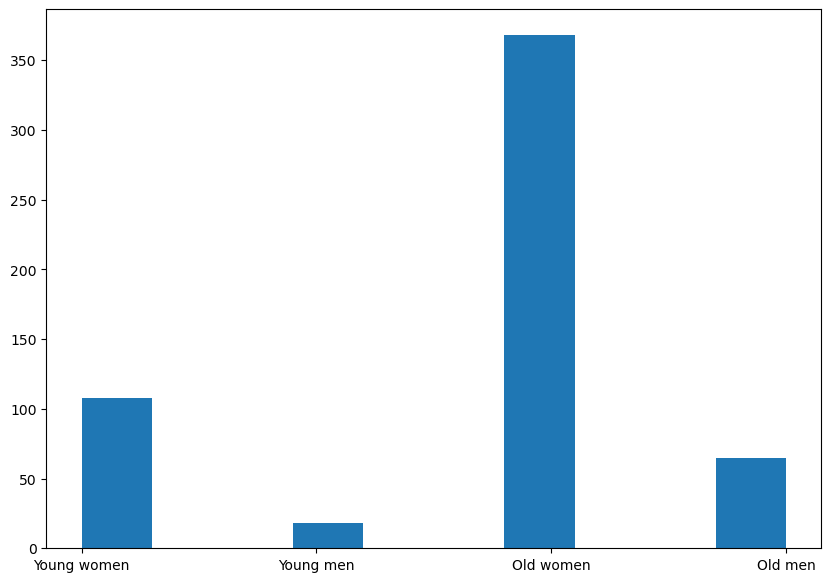

In [14]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y)
plt.show()

In [17]:
smt = SMOTE(random_state=2)
X_smote, y_smote = smt.fit_resample(X, y)
print(y_smote.value_counts())

Young women    368
Young men      368
Old women      368
Old men        368
Name: Target, dtype: int64


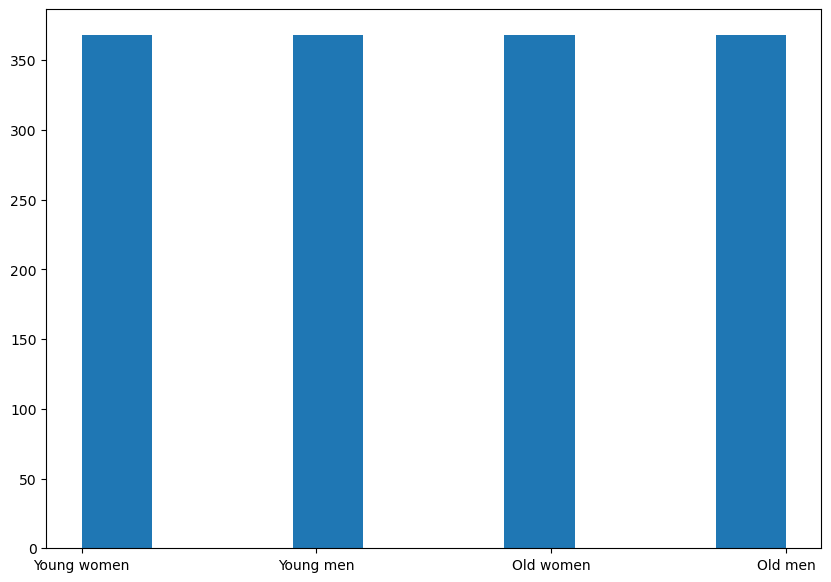

In [19]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_smote)
plt.show()

We can see this is an imbalanced data which may cause some class be highly Correlated and the result will not be precise. I use smote to generated more sample in order to make it a balanced data. Where SMOTE is an oversampling technique where the synthetic samples are generated for the minority class and the advantages are it can overcome the overfitting problem posed by random oversampling.